# Fitting extreme values

## Part 1: Introduction and set up

In this workshop, you will work with data on the concentration of Chlorofill ($Chla$) in offshore waters. As you probably know, this variable is used to measure the amount of algae that is present in the water. If there are very high concentrations of $Chla$, it can be an indication that there is an overgrowth of algae due to an excess of nutrients, too little water movement and renewal, between others, potentially leading to situations such as eutrophization.

Your colleagues have been monitoring the concentrations of $Chla$ ($mg/m^3$) for around 9 months in the location where you want to build an offshore farm as you want to ensure that these concentrations are not too high for the fishes to grow appropriately. To this end, you will model the weekly extremes of $Chla$ and compute the probability of being above recommended values for the fishes growth.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

In [2]:
def findfile(fname):
    if not os.path.isfile(fname):
        print(f"Downloading {fname}...")
        urlretrieve('http://files.mude.citg.tudelft.nl/'+fname, fname)

findfile('chla.csv')

In [3]:
data = pd.read_csv('chla.csv', delimiter = ',', skiprows=0)
data['time'] = pd.to_datetime(data['time'], format='mixed')
data.columns = ['time', 'Chla']

data.head()

time      Chla
0 2014-03-01 00:00:00  7.101283
1 2014-03-01 01:00:00  7.055628
2 2014-03-01 02:00:00  7.018217
3 2014-03-01 03:00:00  7.060986
4 2014-03-01 04:00:00  7.340142

## Part 2: Data exploration

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 2.1:**
    
Explore the data: plot the timeseries and histogram of the data.
Briefly described the data: how does the distribution look like? Do you see any trends or seasonality that could be relevant for our analysis?
    
</p>
</div>

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:11: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_2115/746458633.py:5: SyntaxWarning: invalid escape sequence '\ '
  axes[0].set_xlabel('${Chla \ [mg/m^3]}$')
/tmp/ipykernel_2115/746458633.py:11: SyntaxWarning: invalid escape sequence '\ '
  axes[1].set_ylabel('${Chla \ [mg/m^3]}$')


Text(0.5, 1.0, '(b) Time series')

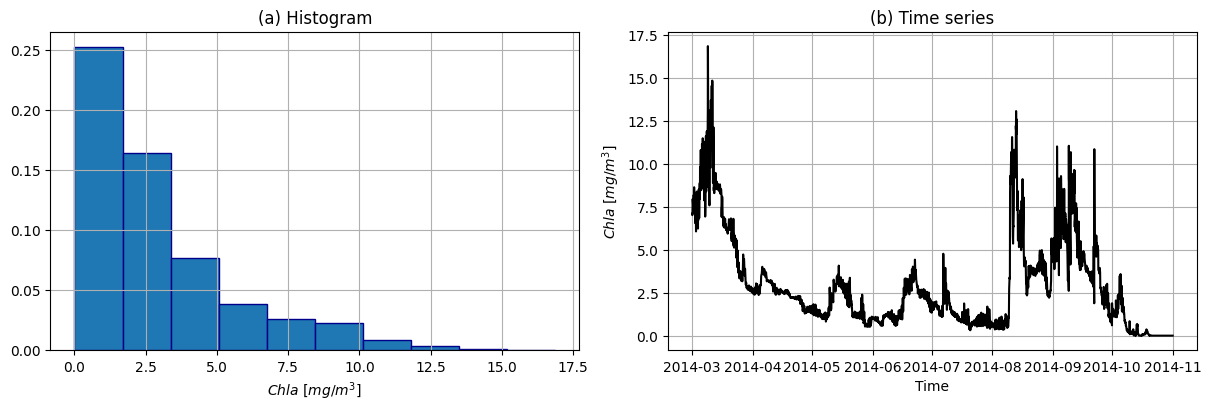

In [4]:
fig, axes = plt.subplots(1,2, figsize=(12,4), layout='constrained')

axes[0].hist(data['Chla'], density = True, edgecolor = 'darkblue')
axes[0].set_xlabel('PDF')
axes[0].set_xlabel('${Chla \ [mg/m^3]}$')
axes[0].grid()
axes[0].set_title('(a) Histogram')

axes[1].plot(data['time'], data['Chla'],'k')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('${Chla \ [mg/m^3]}$')
axes[1].grid()
axes[1].set_title('(b) Time series')

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Solution 2.1:**

The distribution is right skewed with values ranging from 0 to 17.5 $mg/m^3$ and having most of the mass located in low values; the mode is close to zero. From the time series, we can see that the data spans from March to November 2014, roughly 9 months. We do not see a clear trend in the data; there does not seem to be a clear seasonality but we would need to better assess it with a longer timeseries that spans for several years. We can observe several extremes in the timeseries such as the event in March, May or August. 

</div>

## Part 3: Selecting maxima

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 3.1:**
    
Sample weekly maxima from the timeseries and plot them on the timeseries. How many samples do you obtain? Plot also the histograms of both the maxima and the observations. Describe the differences between both histograms.

</p>
</div>

<>:14: SyntaxWarning: invalid escape sequence '\ '
<>:22: SyntaxWarning: invalid escape sequence '\ '
<>:14: SyntaxWarning: invalid escape sequence '\ '
<>:22: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_2115/509642413.py:14: SyntaxWarning: invalid escape sequence '\ '
  axes[0].set_xlabel('${Chla \ [mg/m^3]}$')
/tmp/ipykernel_2115/509642413.py:22: SyntaxWarning: invalid escape sequence '\ '
  axes[1].set_ylabel('${Chla \ [mg/m^3]}$')


Weekly maxima sampled 36 maxima


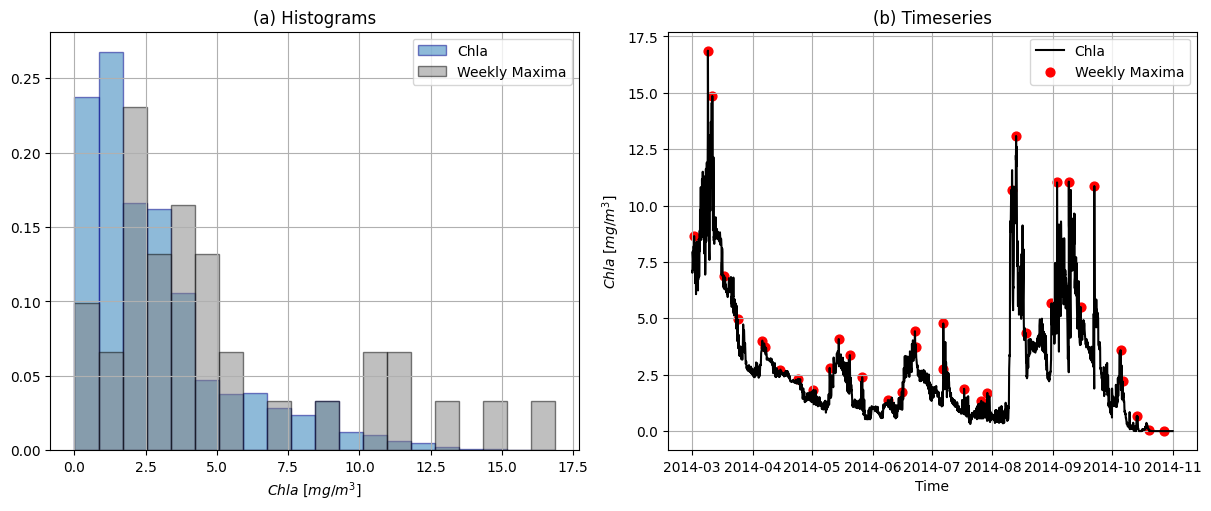

In [5]:
# Extract week from the Date column
data["time"] = pd.to_datetime(data["time"])
data["week"] = data["time"].dt.isocalendar().week

# Extract index of the weekly maxima
weekly_max = data.groupby("week")["Chla"].idxmax()

#Plot
fig, axes = plt.subplots(1,2, figsize=(12,5), layout='constrained')

axes[0].hist(data['Chla'], label = 'Chla', density = True, edgecolor = 'darkblue', bins = 20, alpha = 0.5)
axes[0].hist(data['Chla'].iloc[weekly_max], label = 'Weekly Maxima',  density = True, facecolor = 'grey', edgecolor = 'k', alpha = 0.5, bins = 20)
axes[0].set_xlabel('PDF')
axes[0].set_xlabel('${Chla \ [mg/m^3]}$')
axes[0].grid()
axes[0].set_title('(a) Histograms')
axes[0].legend()

axes[1].plot(data['time'], data['Chla'],'k', label = 'Chla')
axes[1].scatter(data['time'].iloc[weekly_max], data['Chla'].iloc[weekly_max], 40, 'r', label = 'Weekly Maxima')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('${Chla \ [mg/m^3]}$')
axes[1].set_title('(b) Timeseries')
axes[1].grid()
axes[1].legend()
# axes[1].set_xlim([datetime(2014, 5, 1), datetime(2014, 5, 10)])

print('Weekly maxima sampled', len(weekly_max), 'maxima')

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Solution 3.1:**

Weekly maxima sampled 36 maxima which is consistent with the length of the timeseries.

In the previous histogram, we can see how the distributions of the weekly maxima moves towards the tail of the histogram of the observations of $Chla$. However, since we are sampling weekly maxima which is relatively frequent, there is not a dramatic difference between the histograms. This difference would be more noticeable if we would sample monthly or yearly maxima. The frequency of the sampling depends on the nature of the studied phenomenon and the goal of your study. Here, to assess whether the appropriate conditions for the growth of species are met, a lower sampling frequency is needed: if fishes are exposed

</p></div>

## Part 4: Distribution fitting

Don't hesitate to go back to Q1 - week 4. You did it there a lot!

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 4.1:**

Fit the appropriate distribution to the weekly maxima (check the book if you don't remember which one!). Print the values of the obtained parameters and interpret them:
<ol>
    <li>Do the location and scale parameters match the data?</li>
    <li>According to the shape parameter, what type of distribution is this?</li>
    <li>What type of tail does the distribution have (check the book and the description of the distribution in Scipy.stats)?</li>
    <li>Does the distribution have an upper bound? If so, compute it!</li>


</p>
</div>

In [6]:
# Fit GEV distribution to the weekly maxima
params = stats.genextreme.fit(data['Chla'].iloc[weekly_max])

print('Fitted GEV parameters (shape, loc, scale):', params)

Fitted GEV parameters (shape, loc, scale): (np.float64(-0.27860316304382005), np.float64(2.8416241303097998), np.float64(2.4404475738207583))


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Solution 4.1:**

The order of the parameters returned from scipy.stats is shape, location, and scale, so shape = -0.28, location = 2.84 and scale = 2.44. Note that the <a html="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html" target="_blank">genextreme method of scipy.stats</a> defines the PDF of the distribution with a negative shape parameter $c$, relative to the common definition which can be found in our book ($\xi$, shown <a html="https://mude.citg.tudelft.nl/book/eva/GEV.html" target="_blank">here</a>). Thus, shape parameter is positive (according to our book). Positive shape parameters mean that the obtained GEV is a Frechet with a heavy right tail. However, it should be noted that the shape parameter is very close to zero so the obtained distribution will be closer to a Gumbel.

The order of magnitude of the location parameter, location = 2.84, is reasonable according to the histogram plotted in task 3.1. In the histogram of the maxima, the highest value of the density (the mode) is around 2.5. Therefore, a location parameter close to 2.5 is reasonable.

</div>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 4.2:**

Assess the goodness of fit of the selected distribution using the exceedance probability plot in semi-log scale.
    
Consider the following questions:
<ol>
    <li>How well do the probabilities of the fitted distribution match the empirical distribution? Is there an over- or under-prediction?</li>
    <li>Is the tail type of this GEV distribution appropriate for the data?</li>

</p>
</div>

<>:15: SyntaxWarning: invalid escape sequence '\ '
<>:15: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_2115/1203288900.py:15: SyntaxWarning: invalid escape sequence '\ '
  axes.set_xlabel('${Chla \ [mg/m^3]}$')


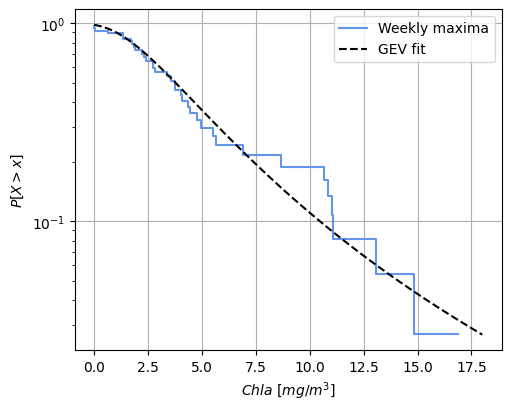

In [7]:
def ecdf(var):
    x = np.sort(var)
    n = x.size
    y = np.arange(1, n+1) / (n+1)
    return [y, x]

x = np.linspace(0, 18, 100)

fig, axes = plt.subplots(1,1, figsize=(5,4), layout='constrained')

axes.step(ecdf(data['Chla'].iloc[weekly_max])[1],
         1-ecdf(data['Chla'].iloc[weekly_max])[0],
         'cornflowerblue', label = 'Weekly maxima')
axes.plot(x, 1-stats.genextreme.cdf(x, *params), 'k--', label = 'GEV fit')
axes.set_xlabel('${Chla \ [mg/m^3]}$')
axes.set_ylabel('${P[X > x]}$')
axes.grid()
axes.set_yscale('log')
axes.legend()

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Solution 4.2:**

Overall, the fit seems satisfactory capturing the shape of the tail. There are larger discrepancies between 7.5 and 12 $mg/m^3$ leading to underprediction of the exceedance probabilities but the tail seems to be adequantly represented with no clear under- or overestimation.

</div>

## Part 5: Return levels

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 5.1:**

Given that the fishes might have problems growing with concentrations over 10 $mg/m^3 \ ^*$, what is the weekly probability of exceeding such concentration? What is the return period associated to that probability?

</p>
</div>

$^*$: This value is not realistic and only meant for academic purposes.

In [8]:
non_exceed_prob = stats.genextreme.cdf(10, *params)
return_period = 1 / (1 - non_exceed_prob)
print(f'The probability of exceeding a Chla concentration of 10 mg/m3 is', np.round(1-non_exceed_prob, 2))
print(f'The return period of a Chla concentration of 10 mg/m3 is {return_period:.1f} weeks')

The probability of exceeding a Chla concentration of 10 mg/m3 is 0.11
The return period of a Chla concentration of 10 mg/m3 is 9.0 weeks


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 5.2:**

Plot the return level plot in months. This is, plot in the x-axis the values of the random variable, $Chla$, and in the y-axis the return periods in months and in log-scale. You can plot it from 0 to 20 $mg/m^3$.

</p>
</div>

<>:9: SyntaxWarning: invalid escape sequence '\ '
<>:9: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_2115/4012314434.py:9: SyntaxWarning: invalid escape sequence '\ '
  axes.set_xlabel('${Chla \ [mg/m^3]}$')


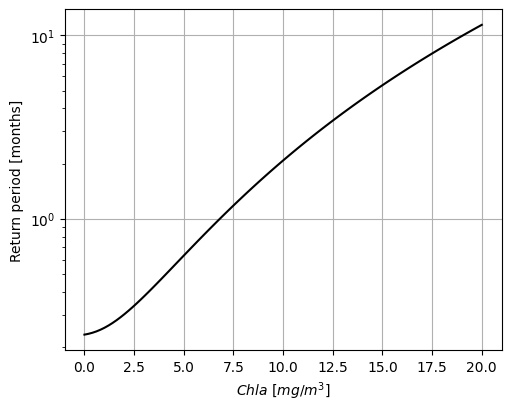

In [9]:
x_chla = np.linspace(0, 20, 100)
non_exceed_prob_rt = stats.genextreme.cdf(x_chla, *params)
return_period_weeks = 1 / (1 - non_exceed_prob_rt)
return_period_months = return_period_weeks / 4.345 # weeks per month in average

fig, axes = plt.subplots(1,1, figsize=(5,4), layout='constrained')

axes.plot(x_chla,return_period_months, 'k')
axes.set_xlabel('${Chla \ [mg/m^3]}$')
axes.set_ylabel('Return period [months]')
axes.grid()
axes.set_yscale('log')

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 5.3:**

Given that the farm that you want to design has a production plan (design life) of 5 years, what is the probability of exceeding $Chla$ concentrations of 10 $mg/m^3$ along the whole design life of the farm?
</p>
</div>

In [10]:
# design life to weeks
design_life_weeks = 5*12*4.345

#exceedance probability weekly
exceed_prob = 1 - stats.genextreme.cdf(10, *params)

# Binomial model
p_design_life_binomial = 1 - (1 - exceed_prob)**design_life_weeks
print('The probability of exceeding 10 mg/m3 in a 5-year period (Binomial model) is', np.round(p_design_life_binomial, 2))

#Poisson model
p_design_life_poisson = 1 - np.exp(-design_life_weeks * exceed_prob)
print('The probability of exceeding 10 mg/m3 in a 5-year period (Poisson) is', np.round(p_design_life_poisson, 2))


The probability of exceeding 10 mg/m3 in a 5-year period (Binomial model) is 1.0
The probability of exceeding 10 mg/m3 in a 5-year period (Poisson) is 1.0


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 5.4:**

Based on the result, what can you say about the viability of the fish farm? You can do some extra calculations to strengthen your argumentation.

</p>
</div>


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Solution 5.4:**

It is certain that along 5 years the concentrations of $Chla$ will go over the desired maximum level. If that cannot be assumed, then it would be needed to move the farm to another location. However, if this excess of $Chla$ can be assumed from time to time, the location could still be a reasonable option.

To better analyze it, we can compute the probability of exceeding it for different periods similarly as before (see code below, only done for Binomial model). As shown below, it is almost certain that the level of $Chla$ concentration will exceed the desired levels every 5 months in average, and very likely every 3 months in average ($P[Chla>10 mg/m^3] \approx 0.8$). Therefore, the location can be considered inadequate, as the desired levels of $Chla$ fall out of the desired range pretty frequently.

</div>

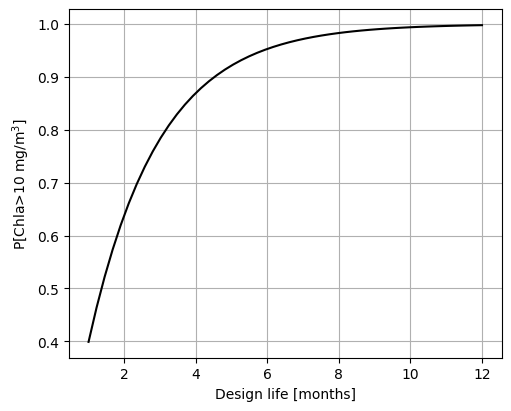

In [11]:
# design life to weeks
design_life_x = np.linspace(1, 12, 50)
design_life_weeks = design_life_x*4.345

#exceedance probability weekly
exceed_prob = 1 - stats.genextreme.cdf(10, *params)

# Binomial model
p_design_life_binomial = 1 - (1 - exceed_prob)**design_life_weeks

# Plot 
fig, axes = plt.subplots(1,1, figsize=(5,4), layout='constrained')

axes.plot(design_life_x,p_design_life_binomial, 'k')
axes.set_xlabel('Design life [months]')
axes.set_ylabel('P[Chla>10 mg/m$^3$]')
axes.grid()

> By Patricia Mares Nasarre, Delft University of Technology. CC BY 4.0, more info on the Credits page of Workbook